Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


Sliding mode control

Dynamic systems

In [2]:
def system(x1, x2, u):
    a = 0.7
    x1_dot = x2
    x2_dot = u + a * np.sin(x1)
    return x1_dot, x2_dot

def first_order_system(x1, u):
    a = 0.7
    x1_dot = u + a * np.sin(x1)
    return x1_dot

tool functions and initializations

In [3]:

def d(x, i, dt):
    if i < 1:
        dx = 0
    else:
        dx = (x[i] - x[i - 1]) / dt
    return dx

n = 100000
times = np.linspace(0, 20, n)
dt = times[1]

y_ref =  10 * np.sin((np.arange(0, n, 1) / n) * 2 * np.pi * 4)



First order 

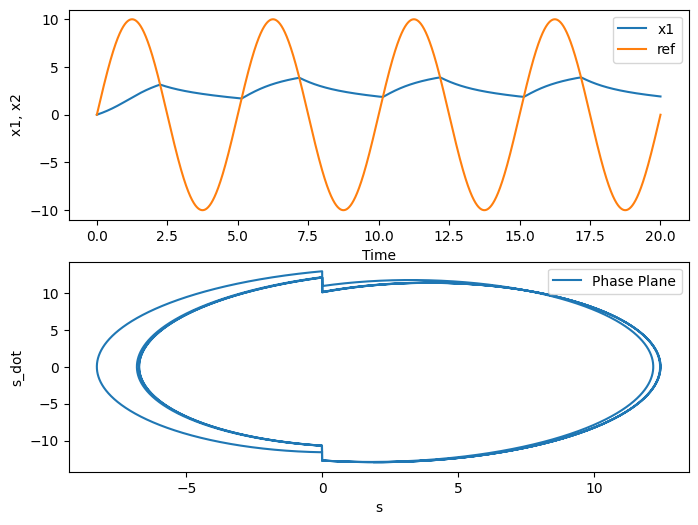

In [4]:

s = np.zeros(n)
s_dot = np.zeros(n)

x1 = np.zeros(n)

y = np.zeros(n)
e = np.zeros(n)
e_dot = np.zeros(n)

c1 = 1
K = 1

for i in range(1, n):
    y[i] = x1[i]
    
    e[i] = y[i] - y_ref[i]
    # e_dot[i] = d(e, i, dt)
    
    # Compute sliding variable
    # s[i] = e_dot[i] + c1 * e[i]
    s[i] = e[i]
    s_dot[i] = d(s, i, dt)
    
    # Control law using np.sign directly
    u = -K * np.sign(s[i])
    
    # Update system response using the control input
    x1_dot = first_order_system(x1[i], u)
    
    # Update states
    if i < n - 1:
        x1[i + 1] = x1[i] + x1_dot * dt

# plot results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=False, sharey=False)

ax1.plot(times, x1, label='x1')
ax1.plot(times, y_ref, label='ref')
ax1.set_xlabel('Time')
ax1.set_ylabel('x1, x2')
ax1.legend()
# Phase plane plot
ax2.plot(s[2:], s_dot[2:], label='Phase Plane')
ax2.set_xlabel('s')
ax2.set_ylabel('s_dot')
ax2.legend()

plt.show()

Twisting rho = 1

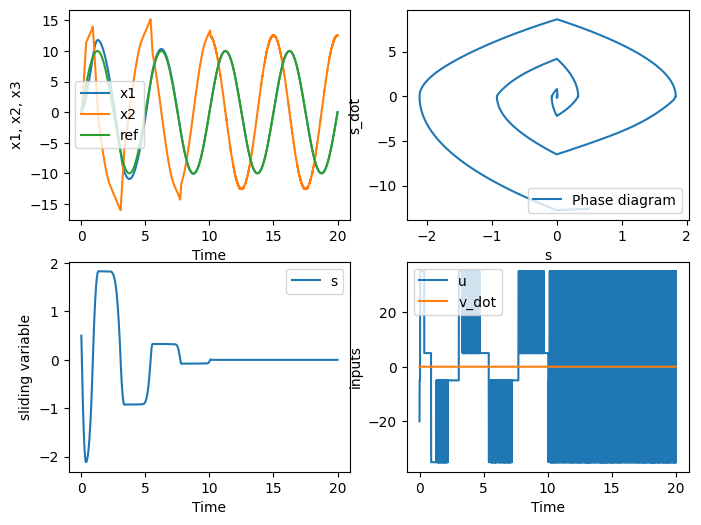

In [9]:
s = np.zeros(n)
s_dot = np.zeros(n)

x1 = np.zeros(n)
x2 = np.zeros(n)

x1[0] = 0.5

y = x1
e = np.zeros(n)

u = np.zeros(n)
v_dot = np.zeros(n)

k1 = 20
k2 = 15

for i in range(n):
    # System output
    y[i] = x1[i]
    
    # Compute error and its derivative
    e[i] = y[i] - y_ref[i]
    
    # Compute sliding variable
    s[i] = e[i]
    s_dot[i] = d(s, i, dt)
    
    # Twisting control law
    u[i] = -k1 * np.sign(s[i]) - k2 * np.sign(s_dot[i])
    
    # Update system response using the control input
    x1_dot, x2_dot = system(x1[i], x2[i], u[i])
    
    # Update states
    if i < n - 1:
        x1[i + 1] = x1[i] + x1_dot * dt
        x2[i + 1] = x2[i] + x2_dot * dt

# Plotting results
fig, axs = plt.subplots(2, 2, num=1, figsize=(8, 6), sharex=False, sharey=False)
(ax1, ax2), (ax3, ax4) = axs 

ax1.plot(times, x1, label='x1')
ax1.plot(times, x2, label='x2')
ax1.plot(times, y_ref, label='ref')
ax1.set_xlabel('Time')
ax1.set_ylabel('x1, x2, x3')
ax1.legend()

ax2.plot(s[2:], s_dot[2:], label='Phase diagram')
ax2.set_xlabel('s')
ax2.set_ylabel('s_dot')
ax2.legend()

ax3.plot(times, s, label='s')
# ax3.plot(times, s_dot, label='s_dot')
ax3.set_xlabel('Time')
ax3.set_ylabel('sliding variable')
ax3.legend()

ax4.plot(times, u, label='u')
ax4.plot(times, v_dot, label='v_dot')
ax4.set_xlabel('Time')
ax4.set_ylabel('inputs')
ax4.legend()

plt.show()

Twisting rho = 2

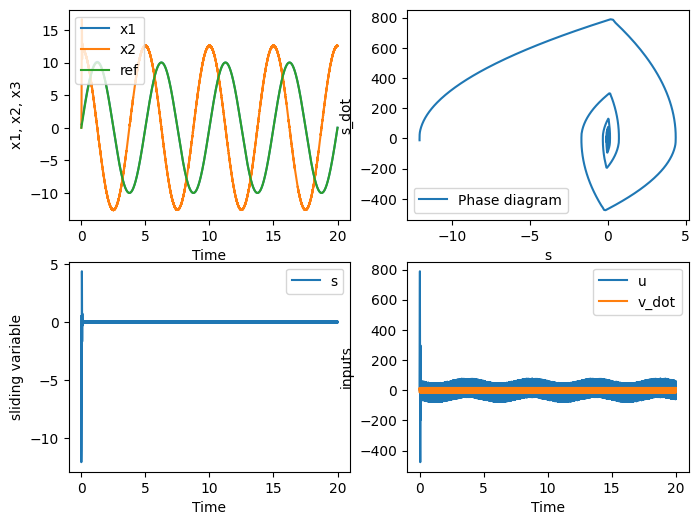

In [6]:
s = np.zeros(n)
s_dot = np.zeros(n)

x1 = np.zeros(n)
x2 = np.zeros(n)

x1[0] = 0.5

y = x1
e = np.zeros(n)
e_dot = np.zeros(n)

u = np.zeros(n)
v_dot = np.zeros(n)

k1 = 10
k2 = 5
c1 = 1

for i in range(n):
    # System output
    y[i] = x1[i]
    
    # Compute error and its derivative
    e[i] = y[i] - y_ref[i]
    e_dot[i] = d(e, i, dt)
    
    # Compute sliding variable
    s[i] = e_dot[i] + c1 * e[i]
    s_dot[i] = d(s, i, dt)
    
    # Twisting control law
    v_dot[i] = - k1 * np.sign(s[i]) - k2 * np.sign(s_dot[i])
    
    # Integrate control input u using simpson rule
    u[i] = integrate.simpson(v_dot[:i + 1])
    
    # Update system response using the control input
    x1_dot, x2_dot = system(x1[i], x2[i], u[i])
    
    # Update states
    if i < n - 1:
        x1[i + 1] = x1[i] + x1_dot * dt
        x2[i + 1] = x2[i] + x2_dot * dt

# Plotting results
fig, axs = plt.subplots(2, 2, num=1, figsize=(8, 6), sharex=False, sharey=False)
(ax1, ax2), (ax3, ax4) = axs 

ax1.plot(times, x1, label='x1')
ax1.plot(times, x2, label='x2')
ax1.plot(times, y_ref, label='ref')
ax1.set_xlabel('Time')
ax1.set_ylabel('x1, x2, x3')
ax1.legend()

ax2.plot(s[2:], s_dot[2:], label='Phase diagram')
ax2.set_xlabel('s')
ax2.set_ylabel('s_dot')
ax2.legend()

ax3.plot(times, s, label='s')
# ax3.plot(times, s_dot, label='s_dot')
ax3.set_xlabel('Time')
ax3.set_ylabel('sliding variable')
ax3.legend()

ax4.plot(times, u, label='u')
ax4.plot(times, v_dot, label='v_dot')
ax4.set_xlabel('Time')
ax4.set_ylabel('inputs')
ax4.legend()

plt.show()


Super Twisting

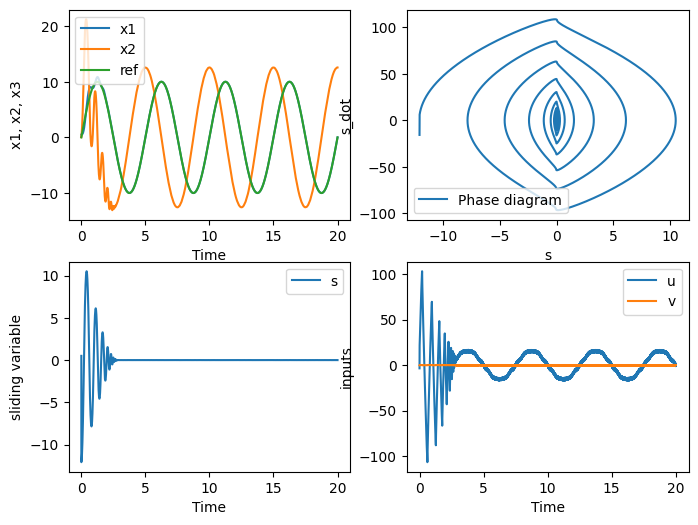

In [7]:
s = np.zeros(n)
s_dot = np.zeros(n)

x1 = np.zeros(n)
x2 = np.zeros(n)

x1[0] = 0.5

y = x1
e = np.zeros(n)
e_dot = np.zeros(n)

u = np.zeros(n)
v_dot = np.zeros(n)

k1 = 5
k2 = 0.1
c1 = 1

for i in range(n):
    # System output
    y[i] = x1[i]
    
    # Compute error and its derivative
    e[i] = y[i] - y_ref[i]
    e_dot[i] = d(e, i, dt)
    
    # Compute sliding variable
    s[i] = e_dot[i] + c1 * e[i]
    s_dot[i] = d(s, i, dt)
    
    # SuperTwisting control law
    v_dot[i] = - k2 * np.sign(s[i])
    u[i] = -k1 * np.sqrt(abs(s[i])) * np.sign(s[i]) + integrate.simpson(v_dot[:i + 1])
    
    # Update system response using the control input
    x1_dot, x2_dot = system(x1[i], x2[i], u[i])
    
    # Update states
    if i < n - 1:
        x1[i + 1] = x1[i] + x1_dot * dt
        x2[i + 1] = x2[i] + x2_dot * dt

# Plotting results
fig, axs = plt.subplots(2, 2, num=1, figsize=(8, 6), sharex=False, sharey=False)
(ax1, ax2), (ax3, ax4) = axs 

ax1.plot(times, x1, label='x1')
ax1.plot(times, x2, label='x2')
ax1.plot(times, y_ref, label='ref')
ax1.set_xlabel('Time')
ax1.set_ylabel('x1, x2, ref')
ax1.legend()

ax2.plot(s[2:], s_dot[2:], label='Phase diagram')
ax2.set_xlabel('s')
ax2.set_ylabel('s_dot')
ax2.legend()

ax3.plot(times, s, label='s')
# ax3.plot(times, s_dot, label='s_dot')
ax3.set_xlabel('Time')
ax3.set_ylabel('sliding variable')
ax3.legend()

ax4.plot(times, u, label='u')
ax4.plot(times, v_dot, label='v_dot')
ax4.set_xlabel('Time')
ax4.set_ylabel('inputs')
ax4.legend()

plt.show()
